In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_FILE = 'uber-raw-data-janjune-15.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,5/17/2015 9:47,B02617,141
1,B02617,5/17/2015 9:47,B02617,65
2,B02617,5/17/2015 9:47,B02617,100
3,B02617,5/17/2015 9:47,B02774,80
4,B02617,5/17/2015 9:47,B02617,90


In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
Dispatching_base_num    1048575 non-null object
Pickup_date             1048575 non-null object
Affiliated_base_num     1036592 non-null object
locationID              1048575 non-null int64
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [4]:
uber_data['Pickup_date'] = pd.to_datetime(uber_data['Pickup_date'], format="%m/%d/%Y %H:%M")
uber_data['DayOfWeekNum'] = uber_data['Pickup_date'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Pickup_date'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Pickup_date'].dt.day
uber_data['HourOfDay'] = uber_data['Pickup_date'].dt.hour

Text(0.5, 1.0, 'Journeys by Week Day')

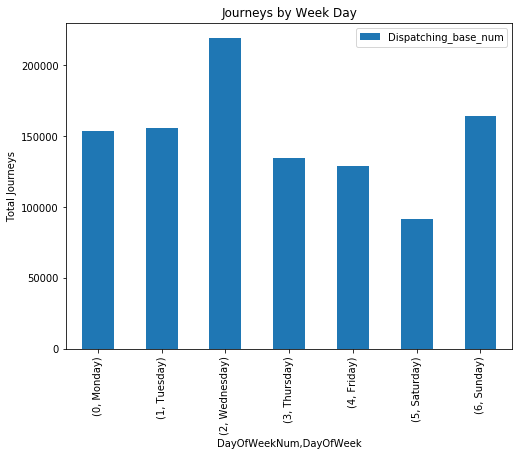

In [5]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],values='Dispatching_base_num',aggfunc='count')

uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')

Text(0.5, 1.0, 'Journeys by Hour')

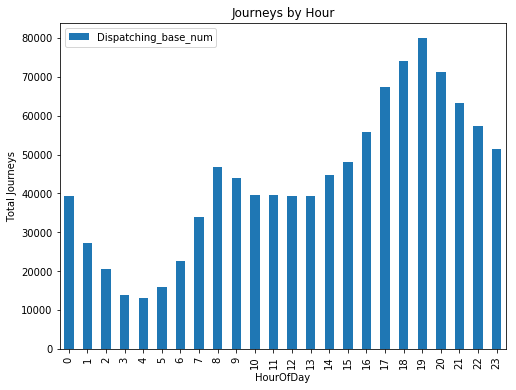

In [6]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Dispatching_base_num',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour')

Text(0.5, 1.0, 'Journeys by Week Day')

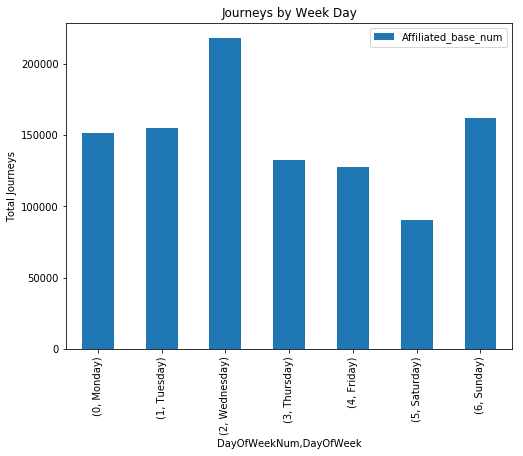

In [7]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],values='Affiliated_base_num',aggfunc='count')

uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')

Text(0.5, 1.0, 'Journeys by Week Day')

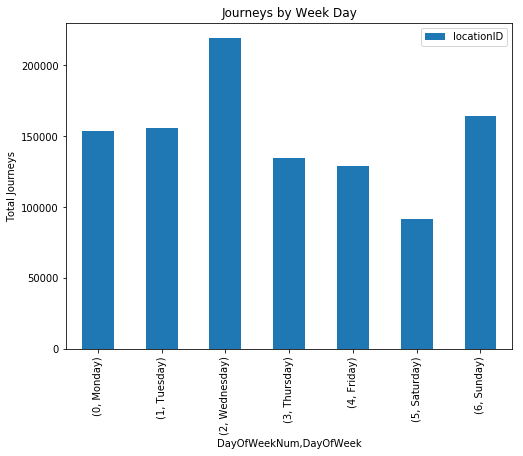

In [8]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],values='locationID',aggfunc='count')

uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')